# Exploring some data cleaning techniques in Python and jupyter notebook. 
Dataset used can be found here: https://www.kaggle.com/c/sberbank-russian-housing-market/data

Python Libraries Used:
1. Pandas: a popular data analysis and manipulation tool, which will be used for most of our data cleaning techniques
2. Seaborn: statistical data visualization library
3. Missingno: missing data-focused visualization package.
4. nltk: natural language toolkit

## Guide:

##### 1. What is Data Cleaning, and why is it important?
        a. why do we have to clean the data?
       
##### 2. Sample Dataset


##### 3. Missing data
    a. How to find out?
    b. What to do?

##### 4. Irregular data (outliers)
    a. How to find out?
    b. What to do?

##### 5. Unnecessary data
    a. Unnecessary type #1: repetitive & uninformative
    b. Unnecessary type #2: irrelevant
    c. Unnecessary type #3: duplicates

##### 6. Inconsistent data
    a. Inconsistent type #1: capitalization
    b. Inconsistent type #2: data types
    c. Inconsistent type #3: typos of categorical values
    d. Inconsistent type #4: addresses

# 1. What is Data Cleaning? 
Data cleaning or data cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

#### 1a. why do we have to clean the data?
In reality, the raw data is almost always messy. If you use such data for analysis, for example, feed into a machine learning model, you’ll get useless insights most of the time. That’s why data cleansing is a critical process for data analysts and data scientists.

Data cleaning involves different processes depending on the datase, but it is still good to have a checklist to start with. In this guide, we’ll cover the most common data cleaning problems. For each problem. 

### 

# 2. Sample Dataset  
For the majority part of the guide, we’ll use the Russian housing market dataset from Kaggle. The goal of the project is to predict housing prices. The dataset is large and it will help us understand most of the data cleaning techniques that we’ll cover.

### Working with Sberbank Russian Housing Market Dataset

In [57]:
import pandas as pd

sberbank = pd.read_csv("C:/Users/bigSylvaa/Documents/Data Analysis Projects/Russian housing market dataset/sberbank.csv")

### Dataset has 30,471 rows and 292 columns.


In [4]:
sberbank.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

### Easier way to tell the total count of columns and rows


In [74]:
sberbank.shape

(30471, 297)

### First 5 rows of the dataset

In [73]:
sberbank.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sub_area_lower,timestamp_dt,year,month,weekday
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,1,0,52,4,5850000,bibirevo,2011-08-20,2011,8,5
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,1,10,66,14,6000000,nagatinskij zaton,2011-08-23,2011,8,1
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,4,67,10,5700000,tekstil'shhiki,2011-08-27,2011,8,5
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0,0,26,3,13100000,mitino,2011-09-01,2011,9,3
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2,91,195,14,16331452,basmannoe,2011-09-05,2011,9,0


### Last 5 rows of the dataset

In [80]:
sberbank.tail()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sub_area_lower,timestamp_dt,year,month,weekday
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,1,2,84,6,7400000,otradnoe,2015-06-30,2015,6,1
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,1,82,171,15,25000000,tverskoe,2015-06-30,2015,6,1
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,0,1,11,1,6970959,poselenie vnukovskoe,2015-06-30,2015,6,1
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,1,4,65,7,13500000,obruchevskoe,2015-06-30,2015,6,1
30470,30473,2015-06-30,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,...,0,9,54,10,5600000,novogireevo,2015-06-30,2015,6,1


### Grouping all columns that has a Numeric Data type
_Var: "numeric_cols"_

In [76]:
numeric_cols = sberbank.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000',
       'price_doc', 'year', 'month', 'weekday'],
      dtype='object', length=279)


### Grouping all columns that has a Non-Numeric Data type
_Var: "non_numeric_cols"_

In [105]:
non_numeric_cols = sberbank.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)


Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology',
       'sub_area_lower', 'timestamp_dt'],
      dtype='object')


# 3. Missing data
Missing data or missing values are when there’s no data value stored for a column in a row. It is very common among real-world datasets. If not handled properly, they would significantly impact the results of data analysis. Many machine learning models can’t tolerate any missing values. So, we must learn how to handle missing data.

#### How to find out?
Before cleaning missing data, we need to learn how to detect it. We’ll cover 3 methods in Python.

1. Method #1: missing data (by columns) count & percentage
2. Method #2: missing data (by columns) heatmap
3. Method #3: missing data (by rows) histogram

## Method #1: missing data (by columns) count & percentage
This is the most basic method to detect missing data among columns.

The info method that we’ve used earlier includes this information. For example, we print out the summary of all the non-numeric columns below. Note that we are not printing for the entire DataFrame df since there are too many columns.

###### By looking at the Non-Null Count, we can spot the number of missing data by columns. For our example, all non-null counts are 30,471, the same as the total number of rows, so there are no missing data among the non-numeric columns!

In [107]:
sberbank[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  30471 non-null  object        
 1   product_type               30471 non-null  object        
 2   sub_area                   30471 non-null  object        
 3   culture_objects_top_25     30471 non-null  object        
 4   thermal_power_plant_raion  30471 non-null  object        
 5   incineration_raion         30471 non-null  object        
 6   oil_chemistry_raion        30471 non-null  object        
 7   radiation_raion            30471 non-null  object        
 8   railroad_terminal_raion    30471 non-null  object        
 9   big_market_raion           30471 non-null  object        
 10  nuclear_reactor_raion      30471 non-null  object        
 11  detention_facility_raion   30471 non-null  object        
 12  wate

### Storing the total number of missing values in each column[First 15 rows].
We can see that the columns id, timestamp, full_sq has 0 missing data. While life_sq has 6,383 missing values, floor has 167 missing values, and so on.
_Var: "num_missing"_

In [109]:
num_missing = sberbank.isna().sum()
num_missing[:15]

id                  0
timestamp           0
full_sq             0
life_sq          6383
floor             167
max_floor        9572
material         9572
build_year      13605
num_room         9572
kitch_sq         9572
state           13559
product_type        0
sub_area            0
area_m              0
raion_popul         0
dtype: int64

### Calculating the percentages of missing values by columns[First 15 rows].
we see that the column life_sq has aabout 21% of its data missing, the column floor has about  0.005% missing.
columns that has zero percentage has no value missing
_Var: "pct_missing"_

In [123]:
pct_missing = sberbank.isna().mean()
pct_missing[:15]

id              0.000000
timestamp       0.000000
full_sq         0.000000
life_sq         0.209478
floor           0.005481
max_floor       0.314135
material        0.314135
build_year      0.446490
num_room        0.314135
kitch_sq        0.314135
state           0.444980
product_type    0.000000
sub_area        0.000000
area_m          0.000000
raion_popul     0.000000
dtype: float64

## Method #2: missing data (by columns) heatmap
##### Seaborn: The seaborn library is a popular statistical data visualization library. Let’s first use it to plot the missing data heatmap.
_Lib: seaborn and missingno._

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

### Building a heatmap to visualize the missing data. This technique is proper when you have a smaller number of columns.
Based on the heatmap below, we can learn the pattern of missing data for the first 30 columns. The horizontal axis shows the column names; the vertical axis shows the number of rows; the yellow color represents the missing data while the blue color is otherwise.

For example, the column life_sq has missing values across different rows. While the column max_floor has most of its missing values before ~10,000 rows. These patterns can potentially help us understand the reason for data being missing.

<AxesSubplot:>

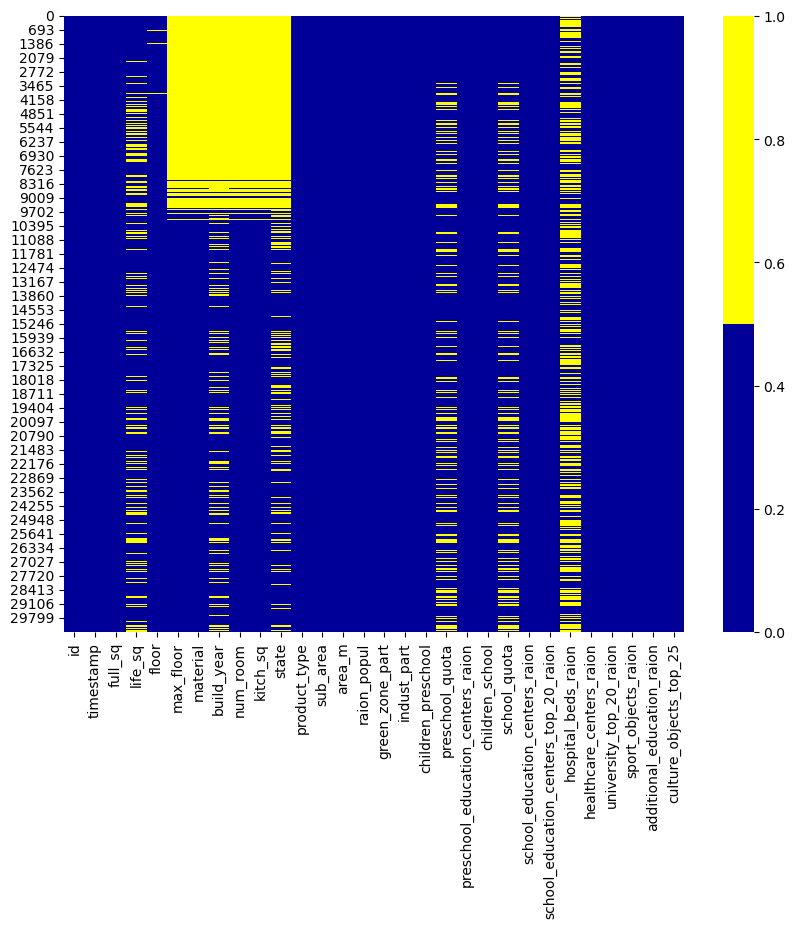

In [114]:
plt.figure(figsize=(10,8))
cols = sberbank.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(sberbank[cols].isna(), cmap=sns.color_palette(colours))

###  Missingno -> The missingno library is a small toolset focused on missing data visualizations and utilities. So you can get the same missing data heatmap as above with shorter code.
_Lib: Missingno_

<AxesSubplot:>

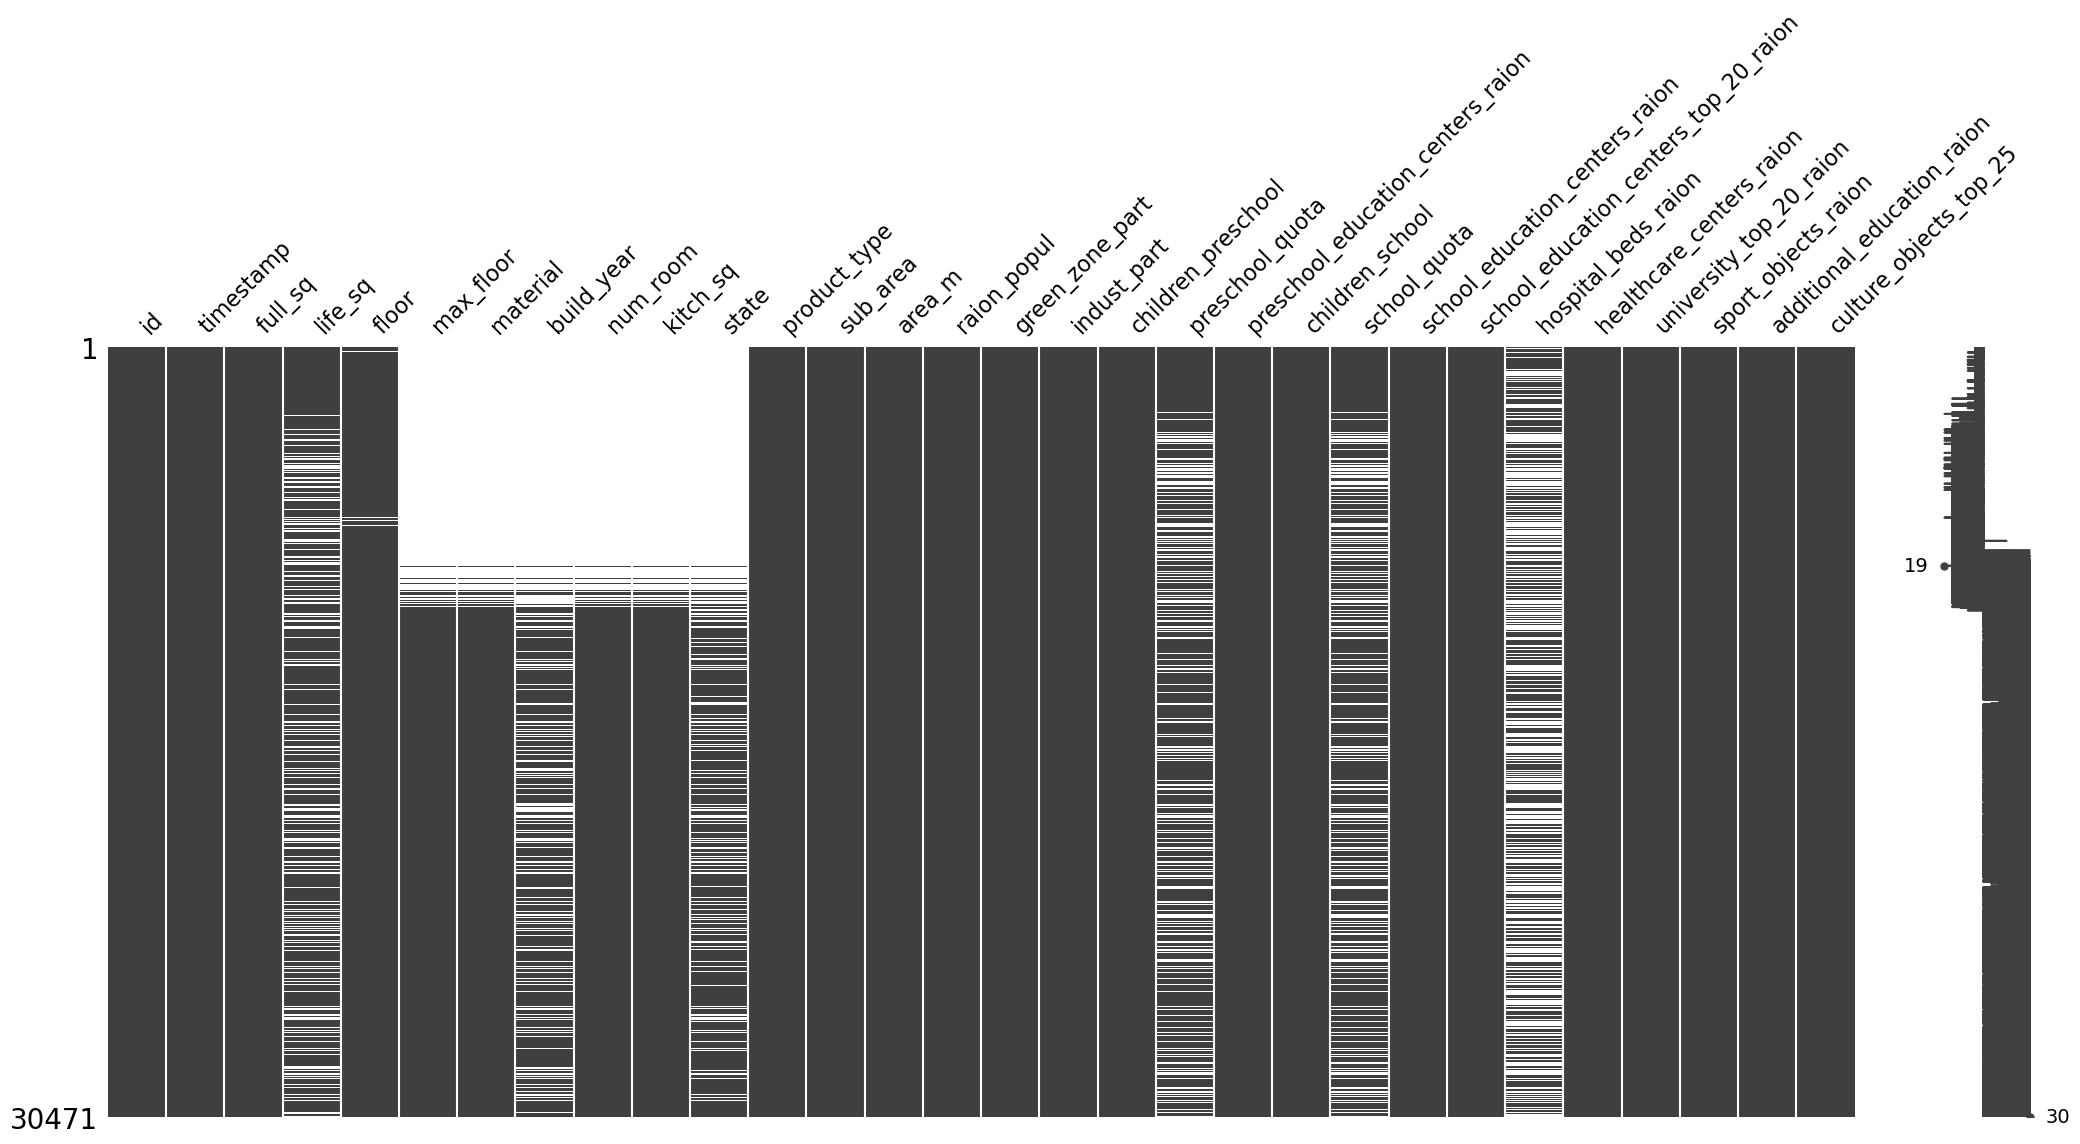

In [13]:
import missingno as msno

import missingno as msno
msno.matrix(sberbank.iloc[:, :30])

## Method #3: missing data (by rows) histogram
Summarizing the missing data by rows. Missing data histogram is a technique for summarizing such information.

This histogram helps to identify the missing patterns among the 30,471 observations. For example, there are over 6,000 observations with no missing values, and close to 4,000 observations with 1 missing value.

<AxesSubplot:>

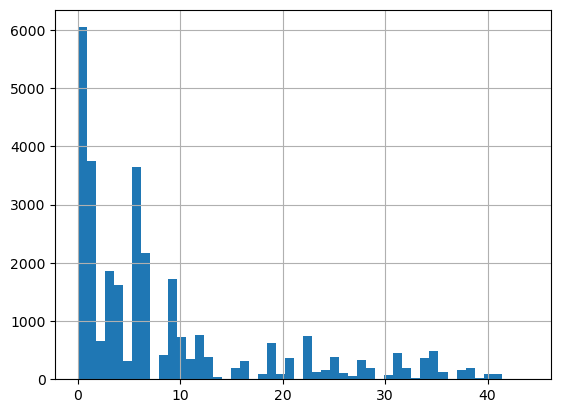

In [14]:
missing_by_row = sberbank.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

## Method #3: Technique #1: drop columns / features
This technique is straightforward. We drop the entire column or feature with missing data, which will certainly cause a loss of information. So we should only perform this when we are sure that the missing data is not informative. Otherwise, we should consider other solutions.

Since we have lots of columns with missing data (51 out of 292), let’s not drop all of them. Let’s consider the columns with a high percentage of missing.

Based on the previous code, pct_missing stores the list of columns and their missing data percentages. What are the columns with over 30% missing data?

### There are 10 columns with over 30% of their data missing.

In [118]:
pct_missing[pct_missing > .3]

max_floor                     0.314135
material                      0.314135
build_year                    0.446490
num_room                      0.314135
kitch_sq                      0.314135
state                         0.444980
hospital_beds_raion           0.473926
cafe_sum_500_min_price_avg    0.435857
cafe_sum_500_max_price_avg    0.435857
cafe_avg_price_500            0.435857
dtype: float64

### Filtering for columns with less than or 30% missing data then apply the copy method to make a copy to the new DataFrame sberbank_less_missing_cols

In [124]:
sberbank_less_missing_cols = sberbank.loc[:, pct_missing <= .3].copy() 
# equivalent to sberbank.drop(columns=pct_missing[pct_missing > .3].index)


### The "sberbank_less_missing_cols" DataFrame has the same number of rows as the original DataFrame, but only 282 columns. So we’ve successfully removed those 10 columns that have more than 30% missing.

In [126]:
sberbank_less_missing_cols.shape

(30471, 287)

## Method #3:Technique #2: drop rows / observations

Only a small amount of observations have over 35 columns all missing. We can create a new dataset sberbank_less_missing_rows to only keep observations with less than 35 missing columns.

This will removed 1,169 rows from the original dataset.

In [21]:
sberbank_less_missing_rows = sberbank[missing_by_row < 35].copy()
sberbank_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(29302, 292)

## Method #3: _Technique #3: impute the missing with constant values_
Imputing the numeric columns with a value of -999 and imputing the non-numeric columns with ‘_MISSING_’.

In [ ]:
sberbank_copy = sberbank.copy()
sberbank_copy[numeric_cols] = sberbank_copy[numeric_cols].fillna(-999)
sberbank_copy[non_numeric_cols] = sberbank_copy[non_numeric_cols].fillna('_MISSING_')

## Method #3: Technique #4: impute the missing with statistics
Besides constants, we can also impute the missing values with statistics. For example, we can impute the numeric columns with their respective medians.

In [26]:
sberbank_copy = sberbank.copy()
med = sberbank_copy[numeric_cols].median()
sberbank_copy[numeric_cols] = sberbank_copy[numeric_cols].fillna(med)

### Locating all the non-numeric columns with their most frequent values.
The variable "most_freq" stores the most common values for each non-numeric column.

In [28]:
most_freq = sberbank_copy[non_numeric_cols].describe().loc['top']
most_freq

timestamp                             2014-12-16
product_type                          Investment
sub_area                     Poselenie Sosenskoe
culture_objects_top_25                        no
thermal_power_plant_raion                     no
incineration_raion                            no
oil_chemistry_raion                           no
radiation_raion                               no
railroad_terminal_raion                       no
big_market_raion                              no
nuclear_reactor_raion                         no
detention_facility_raion                      no
water_1line                                   no
big_road1_1line                               no
railroad_1line                                no
ecology                                     poor
Name: top, dtype: object

### Imputing missing data in all non-numeric columns with their most frequent values.

In [29]:
sberbank_copy[non_numeric_cols] = sberbank_copy[non_numeric_cols].fillna(most_freq)

### Note: As previously shown, the dataset doesn’t have any missing values for the "non-numeric columns". So this step above made no impact to the dataset.

# 4. Irregular data (outliers)
Outliers are data that is distinct from other observations. They could bias our data analysis results, providing a misleading representation of the data. Outliers could be real outliers or mistakes.

## Method #1: descriptive statistics 
##### Using Kurtosis
Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data. So this is a single statistic to detect potential outliers.

##### Among the first 10 columns, we can see that life_sq has the highest kurtosis value. But note that the high value of kurtosis doesn’t guarantee outliers. So we’ll investigate this column more soon.

In [32]:
sberbank.kurt(numeric_only=True)[:10]

id               -1.199940
full_sq       12128.727462
life_sq       17058.409645
floor             1.731182
max_floor         6.595262
material          1.358512
build_year    16865.716093
num_room         13.292374
kitch_sq       4680.043742
state            88.399730
dtype: float64

### Besides the kurtosis, we could look at the column’s common descriptive statistics.
For the column life_sq, we can see that the maximum value is 7,478, while the 75th percentile is only 43. The maximum value is an outlier.

In [34]:
sberbank['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

# Method #2: histogram & box plot
Using data visualization method to detect outliers.  
Plotting a histogram and a box plot of the column "life_sq".

### From the histogram, we can see that the data is highly skewed with the possible existence of outliers. But due to the low frequency, we can’t see the exact location of the outliers and the counts.

<AxesSubplot:>

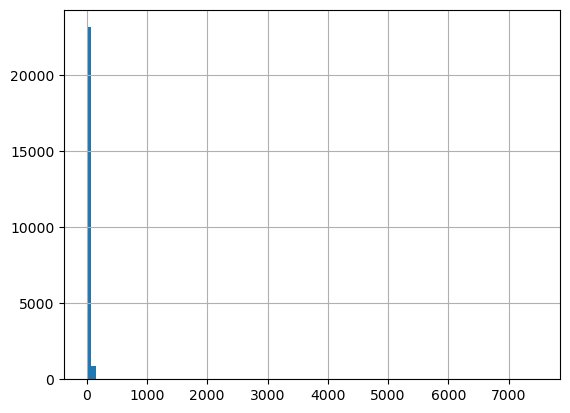

In [134]:
sberbank['life_sq'].hist(bins=100)


### From the box plot, we get a more clear view of the outliers. There is an outlier with a value of over 7,000. In fact, all the dots on the plot are considered outliers by the box plot definition.

<AxesSubplot:>

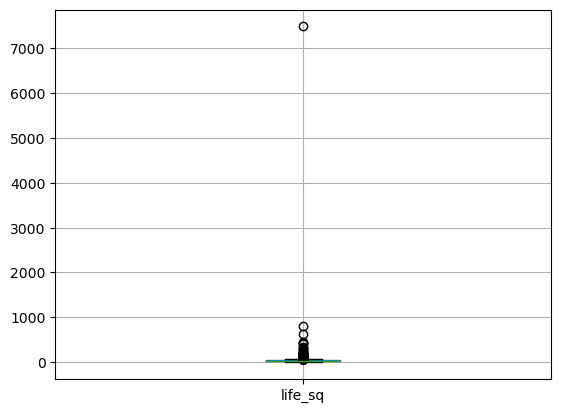

In [135]:
sberbank.boxplot(column=['life_sq'])

# Method #3: bar chart
Outliers are mainly defined for numeric data. But for non-numeric data, there could be irregular values too. We can use a bar chart to learn about the categories and their distributions.

### The column ecology has a reasonable distribution but if there is a category with only one value called ‘extraordinary’, that could be considered an ‘outlier’.

<AxesSubplot:>

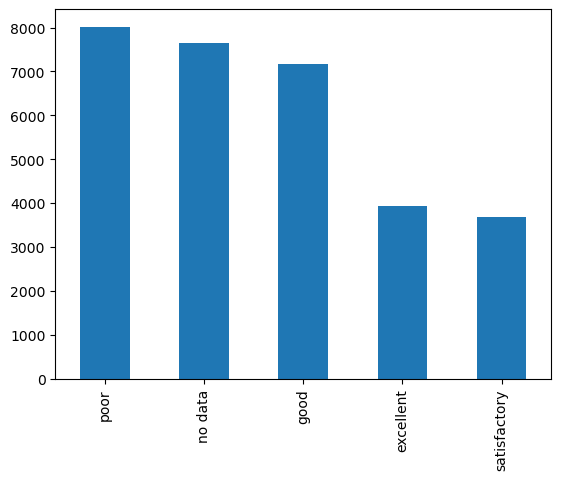

In [37]:
sberbank['ecology'].value_counts().plot(kind='bar')

### Note: While outliers are not hard to see, it is tricky to clean them. It depends on the dataset and the goal of the project.The methods of handling outliers are somewhat similar to missing data. We could drop, replace, or even just keep them.

# 5. Unnecessary data
All the data included in the analysis should support the project’s goal. We consider the data to be unnecessary when it doesn’t add value. 3 main types of unnecessary data:
1. Repetitive & uninformative
2. Irrelevant
3. Duplicates

## Unnecessary type #1: repetitive & uninformative
One column can have many observations being the same value. When an extremely high percentage of the column has a repetitive value, we should investigate whether such a column provides valuable information.
##### How to find out?
We can generate a list of columns with a high percentage of the same value. For example, we specify below to show columns with over 99.9% rows being the same value.
##### What to do?
If there is one column with a high percentage of the same value, we should look into it to see if it’s informative. We can drop them when they are not, e.g., when the column has 100% being the same value.

In [43]:
num_rows = len(sberbank)

for col in sberbank.columns:
    cnts = sberbank[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

## Unnecessary type #2: irrelevant
The data needs to provide valuable information for the project. If the features are not related to the question we are trying to solve, they are irrelevant.

### How to find out?
We need to skim through the features to identify irrelevant ones. For example, a feature recording the temperature in the US wouldn’t provide direct insights into housing prices in Russia.

### What to do?
When the features are not serving the project’s goal, we can remove them. You could use the drop method in pandas.

## Unnecessary type #3: duplicates
The duplicate data is when copies of the same observation exist. Let’s look at 2 main types of duplicate data and clean them in Python.

### Duplicates type #1: all columns based
##### How to find out?
This is easy to understand. Such duplicate occurs when all the columns’ values within the observations are the same. We can use the duplicated method to grab the boolean values of whether a row is duplicated, and then use it to filter for duplicated rows from sberbank.
##### What to do?
If there were any duplicates, we could remove them. We can use the drop_duplicates method. But this will return the same DataFrame since there weren’t any duplicates.

### There are no two rows that look exactly the same. So this returns 0 rows.

In [45]:
sberbank[sberbank.duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc


## Note: If there were any duplicates, we could remove them. We can use the drop_duplicates method. But this will return the same DataFrame since there weren’t any duplicates.

# Duplicates type #2: key columns based
Instead of looking at all columns, sometimes we want to detect duplicates based on a set of identifiers (columns).

##### How to find out?
For example, we know that the column id is probably unique. What if we drop it and see if there are duplicates based on the rest of the columns?

### We first drop id, and then see if there are duplicated rows from the DataFrame.

In [50]:
sberbank[sberbank.drop(columns=['id']).duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
3359,3362,2012-08-27,59,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,4,2,0,3,15,1,0,24,4,4506800
4328,4331,2012-10-22,61,NaN,18.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,5,4,0,1,32,5,8248500
6991,6994,2013-04-03,42,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,3,2,0,2,16,1,0,20,4,3444000
8059,8062,2013-05-22,68,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,3,2,0,2,16,1,0,20,4,5406690
8653,8656,2013-06-24,40,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,1,0,0,4,6,0,0,4,1,4112800
14004,14007,2014-01-22,46,28.0,1.0,9.0,1.0,1968.0,2.0,5.0,...,10,1,0,13,15,1,1,61,4,3000000
17404,17407,2014-04-15,134,134.0,1.0,1.0,1.0,0.0,3.0,0.0,...,0,0,0,0,1,0,0,0,0,5798496
26675,26678,2014-12-17,62,NaN,9.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6552000
28361,28364,2015-03-14,62,NaN,2.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6520500
28712,28715,2015-03-30,41,41.0,11.0,17.0,1.0,2016.0,1.0,41.0,...,2,2,0,2,9,0,0,7,2,4114580


## Note: We could remove them and save the new dataset as sberbank_dedupped. We can also compare the shapes of the two datasets (sberbank and sberbank_dedupped).

## There were 10 rows removed as duplicates.

In [51]:
sberbank_dedupped = sberbank.drop(columns=['id']).drop_duplicates()

print(sberbank.shape)
print(sberbank_dedupped.shape)

(30471, 292)
(30461, 291)


### let’s assume that if two transactions have the same timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc, they are duplicates. Let’s look at duplicates based on this set of columns. We can use the below code to show the duplicated rows based on those columns.

## Their are 16 rows returned as duplicates

In [59]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']


sberbank_grouped = sberbank.fillna(-999).groupby(key)['id'].count()

sberbank_grouped[sberbank_grouped > 1]

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-08-27  59       -999.0   6.0    -999.0      -999.0    4506800      2
2012-09-05  43       -999.0   21.0   -999.0      -999.0    6229540      2
2012-10-22  61       -999.0   18.0   -999.0      -999.0    8248500      2
2013-04-03  42       -999.0   2.0    -999.0      -999.0    3444000      2
2013-05-22  68       -999.0   2.0    -999.0      -999.0    5406690      2
2013-06-24  40       -999.0   12.0   -999.0      -999.0    4112800      2
2013-08-30  40       -999.0   12.0   -999.0       1.0      4462000      2
2013-09-23  85       -999.0   14.0   -999.0       3.0      7725974      2
2013-12-05  40       -999.0   5.0    -999.0       1.0      4414080      2
2013-12-18  39       -999.0   6.0    -999.0       1.0      3700946      2
2014-01-22  46        28.0    1.0     1968.0      2.0      3000000      2
2014-04-15  134       134.0   1.0     0.0         3.0      5798496      2
2014-12-09  40       -999.0   17.0   -999.0

### Dropping duplicates based on the subset of key columns.
##### We’ve successfully dropped the 16 duplicates in the new dataset named sberbank_dedupped2.

In [61]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
sberbank_dedupped2 = sberbank.drop_duplicates(subset=key)

print(sberbank.shape)
print(sberbank_dedupped2.shape)

(30471, 292)
(30455, 292)


# 6. Inconsistent data
It is crucial to have the dataset follow specific standards. There could be different inconsistent data that needs to be cleaned and we’ll cover 4 common ones. Please note that the actual data may be even messier, be creative when cleaning it!

### Inconsistent type #1: capitalization
Inconsistent use of upper and lower cases in categorical values is typical. We need to clean it since Python is case-sensitive.

### Note: sub_area stores the name of different areas. We are lucky that the text in this column looks standardized. But there could be inconsistent capitalizations. For instance, ‘Poselenie Sosenskoe’ and ‘pOseleNie sosenskeo’ could refer to the same district.

In [62]:
sberbank['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

##### What to do?
To avoid this, we can lowercase (or uppercase) all letters.

In [63]:
sberbank['sub_area_lower'] = sberbank['sub_area'].str.lower()
sberbank['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

### Inconsistent type #2: data types
Another standardization we often need to look at is the data types.


##### How to find out?

If you recall, earlier, we’ve used the info method to print out the summary of the DataFrame. We could see the data types of each column. We could also print out one column to take a look. Let’s try timestamp.

### Timestamp has dtype of object while it records dates

In [64]:
sberbank['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object

### What to do?
We can convert the column to a DateTime format and even extract the specific year, month, weekday, etc.

In [66]:
sberbank['timestamp_dt'] = pd.to_datetime(sberbank['timestamp'], format='%Y-%m-%d')
sberbank['year'] = sberbank['timestamp_dt'].dt.year
sberbank['month'] = sberbank['timestamp_dt'].dt.month
sberbank['weekday'] = sberbank['timestamp_dt'].dt.weekday

sberbank[['timestamp_dt', 'year', 'month', 'weekday']].head()

,timestamp_dt,year,month,weekday
0,2011-08-20,2011,8,5
1,2011-08-23,2011,8,1
2,2011-08-27,2011,8,5
3,2011-09-01,2011,9,3
4,2011-09-05,2011,9,0


### Inconsistent type #3: typos of categorical values
#### How to find out?
Let’s see an example. Within the code below:

1. We generate a new DataFrame, df_city_ex
2. There is only one column that stores the city names. There are misspellings. For example, ‘torontoo’ and ‘tronto’ both refer to the city of ‘toronto’.
3. The variable cities stores the 4 correct names of ‘toronto’, ‘vancouver’, ‘montreal’, and ‘calgary’.
4. To identify typos, we use fuzzy logic matches. We use edit_distance from nltk, which measures the number of operations (e.g., substitution, insertion, deletion) needed to change from one string into another string.
5. We calculate the distance between the actual values and the correct values.

### The typos have a smaller ‘distance’ from the correct value. Because they only differ by a couple of letters.

In [68]:
sberbank_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

cities = ['toronto', 'vancouver', 'montreal', 'calgary']
from nltk.metrics import edit_distance
for city in cities:
    sberbank_city_ex[f'city_distance_{city}'] = df_city_ex['city'].map(lambda x: edit_distance(x, city))

sberbank_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,torontoo,1,8,7,8
1,toronto,0,8,7,7
2,tronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancover,7,1,7,7
5,vancouvr,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


### What to do?
We can set criteria to convert these typos to the correct values. For example, the below code sets all the values within 2 characters distance from ‘toronto’/’vancouver’ to be ‘toronto’/’vancouver’.

In [69]:
msk = sberbank_city_ex['city_distance_toronto'] <= 2
sberbank_city_ex.loc[msk, 'city'] = 'toronto'

msk = sberbank_city_ex['city_distance_vancouver'] <= 2
sberbank_city_ex.loc[msk, 'city'] = 'vancouver'

sberbank_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,toronto,1,8,7,8
1,toronto,0,8,7,7
2,toronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancouver,7,1,7,7
5,vancouver,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


### Inconsistent type #4: addresses
If you’ve worked with addresses, you know how messy they can be. Just imagine how people can write addresses in all different ways!

##### How to find out?
We can find messy address data by looking at it. Even though sometimes we can’t spot any problems, we can still run code to standardize them in case there are hidden issues.

There is no address column in our housing dataset due to privacy. Let’s create a new dataset df_add_ex with a column address. As shown below the addresses are quite messy.

In [71]:

df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


### What to do?
We can run the below code to:

1. lowercase the letters
2. remove leading and trailing white spaces
3. delete periods
4. standardize wordings

### We are using regular expressions to specify search patterns.

In [72]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespaces.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '', regex=True) # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st', regex=True) # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt', regex=True) # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave', regex=True) # replace av with ave.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
